# Bayesian Linear Regression

Suppose we are given a dataset $\mathcal{D}=\left\{({\bf x}_n, y_n)\vert {\bf x}_n \in \mathbb{R}^M, y_n\in\mathbb{R} \right\}_{n=1}^N$. Where each element $y_n$ is modelled as


$$
    y_n\vert {\bf x}_n \sim \mathcal{N}({\bf w}^T{\bf x}, \sigma^2)
$$

Furthermore, we we assign $\bf w$ a *prior* distribution of the form ${\bf w}\sim\mathcal{N}(\boldsymbol\mu_0, \boldsymbol\Sigma_0)$. Our goal is to find the *posterior* distribution ${\bf w}\vert \mathcal{D}$, i.e.,


$$
\begin{aligned}
p({\bf w}\vert \mathcal{D}) &\propto p({\bf w})p(\mathcal D\vert {\bf w})\\
&= \mathcal{N}({\bf w}\vert \boldsymbol\mu_0, \boldsymbol\Sigma_0) \mathcal{N}({\bf y} \vert {\bf X}{\bf w}, \sigma^2{\bf I})
\end{aligned}
$$

To find the posterior conjugate (a closed-form solution), note that

$$
    {\bf z}^T{\bf A}{\bf z} - 2{\bf z}^T{\bf b} + c = ({\bf z} - {\bf A}^{-1}{\bf b})^T{\bf A}({\bf z} - {\bf A}^{-1}{\bf b}) - {\bf b}^T{\bf A}^{-1}{\bf b} + c
$$

Then,
$$
\begin{align}
    p({\bf w}\vert \mathcal{D}) &\propto \exp\left(-\frac{1}{2} ({\bf w} - \boldsymbol\mu_0)^T\Sigma_0^{-1}({\bf w} - \boldsymbol\mu_0) -\frac{1}{2\sigma^2} ({\bf y} - {\bf X w})^T({\bf y} - {\bf X w}) \right)\\
    &= \exp\left(-\frac{1}{2}\left( ({\bf w} - \boldsymbol\mu_0)^T\Sigma_0^{-1}({\bf w} - \boldsymbol\mu_0) +\frac{1}{\sigma^2} ({\bf y} - {\bf X w})^T({\bf y} - {\bf X w})\right) \right)\\
    &\propto \exp\left(-\frac{1}{2}\left[{\bf w}^T \left(\boldsymbol\Sigma_0^{-1} + \frac{1}{\sigma^2}{\bf X}^T{\bf X}\right) - 2{\bf w}^T \left(\boldsymbol\Sigma_0^{-1}\boldsymbol\mu_0 + \frac{1}{\sigma^2}{\bf X}^T{\bf y}\right) \right]\right)
\end{align}
$$

This last expression reduces to

$$
    p({\bf w}\vert \mathcal{D}) \propto \exp\left(-\frac{1}{2}({\bf w} - {\bf m}_N)^T {\bf S}_N^{-1} ({\bf w} - {\bf m}_N)\right)
$$

Where
* ${\bf S}_N^{-1} = \boldsymbol\Sigma_0^{-1} + \frac{1}{\sigma^2}{\bf X}^T{\bf X}$
* ${\bf m}_N = {\bf S}_N \left(\boldsymbol\Sigma_0^{-1}\boldsymbol\mu_0 + \frac{1}{\sigma^2}{\bf X}^T{\bf y}\right)$

## Posterior Distribution

In [12]:
# Beta is the known error term;
# Alpha is the variance (assuming an isotropic gaussian)
alpha, beta = sym.symbols("alpha beta")

S0 =  sym.Identity(3) / alpha
m0 = sym.MatrixSymbol("m", 3, 1)
phi = sym.MatrixSymbol("Phi", 5, 3)
t = sym.MatrixSymbol("t", 5, 1)

In [20]:
Sn = S0 + (phi.T @ phi).inv() / beta
mn = Sn @ (S0.inv() @ m0 + beta * phi.T @ t)

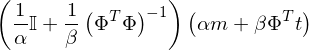

In [21]:
Sn * (S0.inv() @ m0 + beta * phi.T @ t)